In [38]:
import pandas as pd

def convert(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text


items = {".":"",
        ",":"",
        ",":" ",
        "?":"", 
        '"':'', 
        ":":"",
        ";":""}


with open('file.txt') as a:
    file = a.read()
    
    
file = convert(file,items)
b = pd.Series(file.split()).str.lower().value_counts()

In [39]:
data = pd.DataFrame({"values":b.index,
             "count":b}).reset_index().drop("index",axis=1)

In [42]:
data["values"] = data["values"].astype(str)
data["values"] = data["values"].replace(" ","")

In [43]:
data

,values,count
0,bir,127
1,bu,69
2,da,59
3,var,57
4,ve,57
...,...,...
2510,getirmezlerse,1
2511,ocağı,1
2512,belgesini,1
2513,kantindeki,1


In [44]:
with open("turkce-stop-words") as a:
    file = a.read()
stop = file.split("\n")
data = data[~data["values"].isin(stop)]
print("stopwords sayısı :",len(stop))

stopwords sayısı : 312


In [45]:
data[:20]

,values,count
5,esnaf,45
8,para,33
9,diyor,29
11,yok,26
18,devlet,21
22,lira,20
24,esnafa,17
26,diyorlar,16
30,kira,14
31,esnafın,14


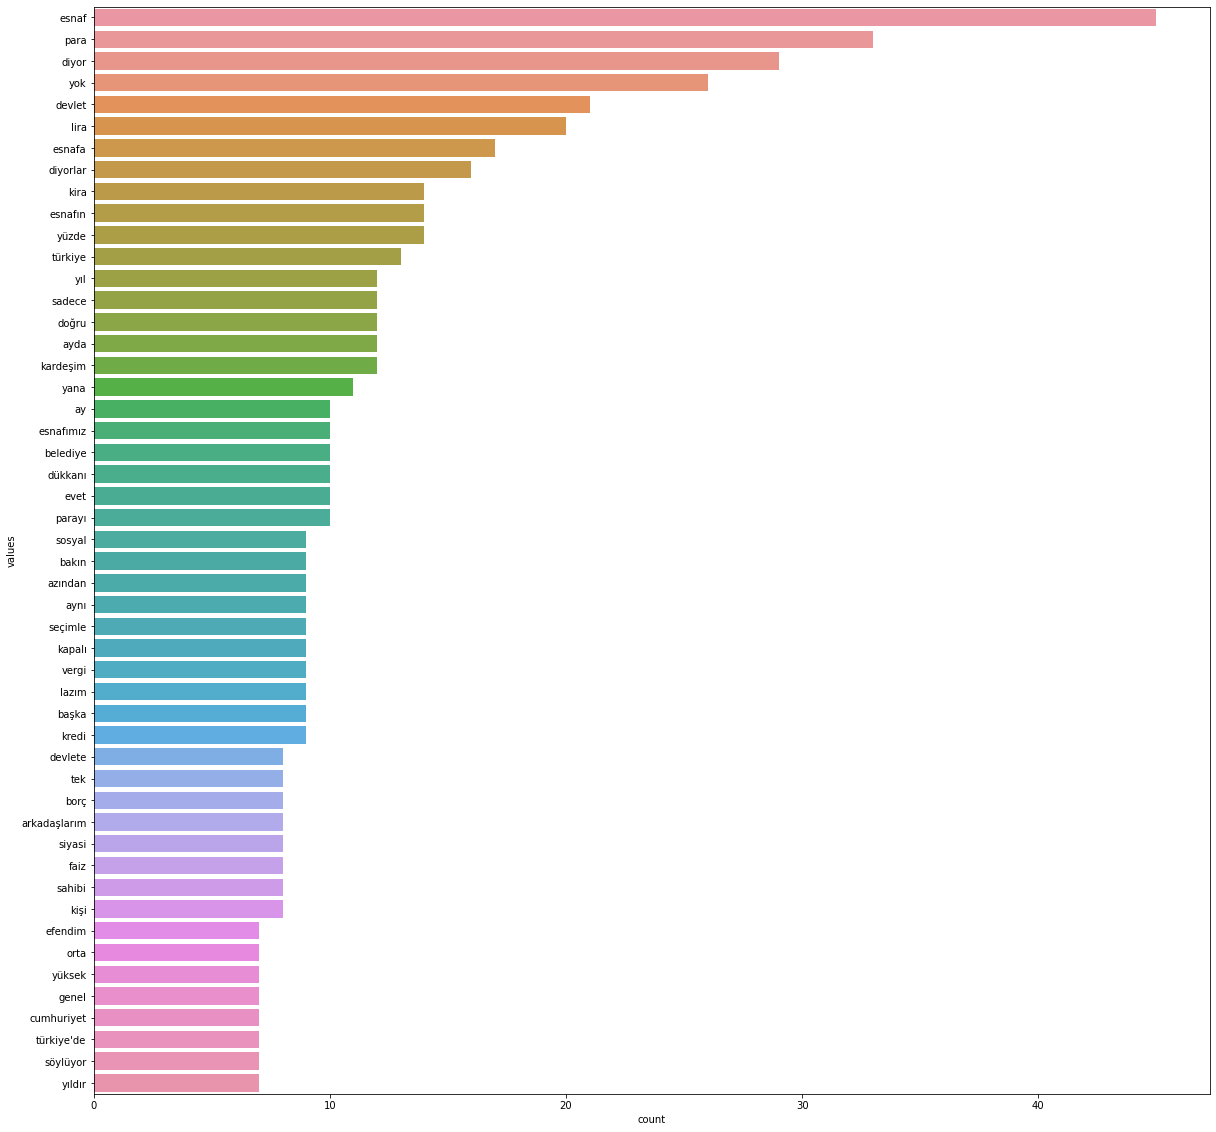

In [46]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))

sns.barplot(x="count",
           y="values",
           data=data.iloc[:50,:],
           ax=ax);

In [47]:
txt = ",".join(list(data["values"].values))

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

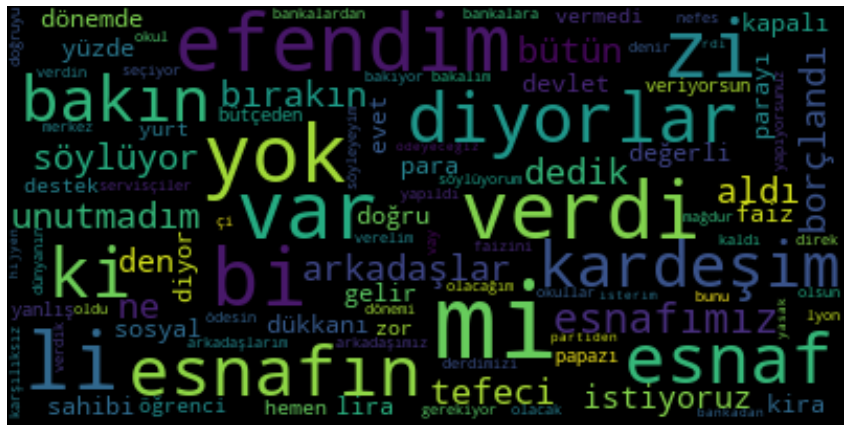

In [28]:
from wordcloud import WordCloud
from PIL import Image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(txt)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
wordcloud.to_file("word.png")